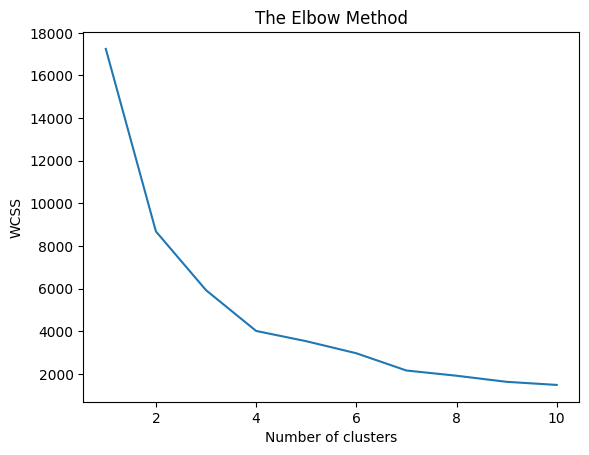

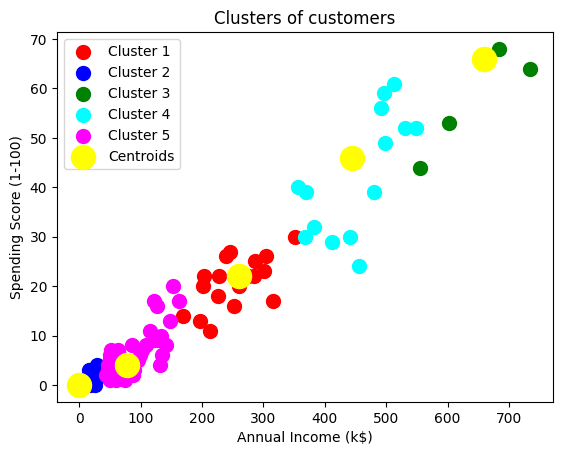

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids


# Importing the dataset
dataset = pd.read_csv("ipl.csv",header=None)
X = dataset.iloc[:, [4, 11]].values

# Using the elbow method to find the optimal number of clusters
from sklearn_extra.cluster import KMedoids
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++', random_state = 42) # Changed 'k-means++' to 'k-medoids++'
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset
kmedoids = KMedoids(n_clusters = 5, init = 'k-medoids++', random_state = 0) # Changed 'kMediods++' to 'k-medoids++' and kmedoids to KMedoids
y_kmedoids = kmedoids.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids== 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmedoids == 3, 0], X[y_kmedoids == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmedoids == 4, 0], X[y_kmedoids == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()